# Workshop de Machine Learning - Dia 1

## Aprendizado supervisionado - Classificação

Nesta seção do workshop, solucionaremos dois desafios de classificação (aprendizado supervisionado).

# 1. Classificação com o Iris Dataset

---

Dataset bem básico e pré-processado, considerado por muitos o "Hello World" do Machine Learning.

**Target**: tipo de flor Iris;


[Mais informações](https://en.wikipedia.org/wiki/Iris_flower_data_set)

## Importando bibliotecas que serão utilizadas e verificando suas versões

In [0]:
import sys
import numpy as np
import scipy
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
# Checar versões e se bibliotecas foram importadas com sucesso.

# Python version
print('Python: {}'.format(sys.version))
# scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
print('numpy: {}'.format(np.__version__))
# matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
print('pandas: {}'.format(pd.__version__))
# scikit-learn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
scipy: 1.3.0
numpy: 1.16.4
matplotlib: 3.0.3
pandas: 0.24.2
sklearn: 0.21.2


## Carregar dataset

In [0]:
# URL do dataset no GitHub
url = "https://raw.githubusercontent.com/MateusCichelero/ML_Class/master/iris/iris.csv"

# Nome das features
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Definir dataset, lendo do URL e colocando os nomes nas features
dataset = pd.read_csv(url, names = names)

## Análise do Dataset

In [0]:
# Tipo de dado
type(dataset)

pandas.core.frame.DataFrame

In [0]:
# Dimensão do dataset
dataset.shape

(150, 5)

In [0]:
# Visualização dos primeiros casos
dataset.head(8)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


In [0]:
# Descrição estatística
dataset.describe()

In [0]:
# Distribuição das classes (quantas casos pertencem a cada classe)
dataset.groupby('class').size()

## Visualização dos Dados

In [0]:
# box-whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [0]:
# histograma
dataset.hist()
plt.show()

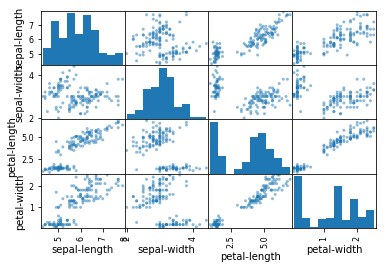

In [0]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

## Avaliação de alguns métodos

---
* Separar um dataset de validação.
* Preparar train/test dataset e usar 10-fold cross validation. (overfitting vs underfitting e generalização).
* Construir 5 modelos diferentes para classificar as espécies de flores através das medidas de suas dimensões.
* Selecionar o melhor modelo.


In [0]:
# Separa dataset de validação
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [0]:
# Metrica de avaliação
seed = 7
scoring = 'accuracy'

In [0]:
# Construção lista de modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [0]:
type(models)

In [0]:
# Avaliação dos modelos

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

In [0]:
# Compara Modelos

fig = plt.figure()
fig.suptitle('Comparação Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Predição para dados de validação

In [0]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# 2.  Predizendo sobreviventes do Titanic 

---
[link da competição no kaggle](https://www.kaggle.com/c/titanic/overview)


In [0]:
# Test dataset
url = 'https://raw.githubusercontent.com/MateusCichelero/ML_Class/master/Titanic_kaggle/test.csv'
test = pd.read_csv(url)
#Verifica o formato de 'test'
test.shape

In [0]:
#Train dataset
url = 'https://raw.githubusercontent.com/MateusCichelero/ML_Class/master/Titanic_kaggle/train.csv'
train =pd.read_csv(url)
#Verifica o formato de 'train'
train.shape

### Descrição dos dados


*  PassengerID - A column added by Kaggle to identify each row and make submissions easier
* Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
* Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
* Sex - The passenger's sex
* Age - The passenger's age in years
* SibSp - The number of siblings or spouses the passenger had aboard the Titanic
* Parch - The number of parents or children the passenger had aboard the Titanic
* Ticket - The passenger's ticket number
* Fare - The fare the passenger paid
* Cabin - The passenger's cabin number
* Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)


In [0]:
#Apresenta primeiros 15 valores de 'train'



*   Podemos ter algumas considerações iniciais que envolvem o problema. Ex: Mulheres e crianças provavelmente tinham mais chances de serem salvas.



In [0]:
sex_pivot = #CODE HERE
sex_pivot

In [0]:
sex_pivot.plot.bar()
plt.show()



*   E quando consideramos a classe social dos passageiros? Podemos analisar a feature Pclass:



In [0]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
# pclass_pivot
pclass_pivot.plot.bar()
plt.show()



*   Analisamos também os sobreviventes de acordo com a idade:




In [0]:
train['Age'].describe()

- valores fracionados para passageiros com idade < 1 ano
- 714 valores nessa coluna, 814 valores esperados
- variável numérica contínua. 

In [0]:
train[train["Survived"] == 1]

- Podemos analisar seu histograma (como valores se distribuem para cada categoria)



In [0]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

- Vamos separar faixas de idade para o treinamento de nossos modelos.
</br>pandas.cut()

In [0]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

![alt text](https://s3.amazonaws.com/dq-content/185/cut.svg)

- Criamos os cut_points e label_names para dividir a coluna Age em seis categorias:
    - Missing, de -1 a 0
    - Infant, de 0 a 5
    - Child, de 5 a 12
    - Teenager, de 12 a 18
    - Young Adult, de 18 a 35
    - Adult, de 35 a 60
    - Senior, de 60 a 100
- Aplicamos o process_age() nos dados de treinamento, atribuímos resultado à train.
- Mesmo para os dados de teste.

In [0]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [##INSERT VALUES HERE]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

## Preparando dados para ML

---
* Usaremos as colunas "Sex", "Pclass" e "Age_categories"
* Conversão de categorias 'texto' para números
* Remover a relação quantitativa entre as categorias de Pclass (dummy columns)

In [0]:
train['Pclass'].value_counts()

![alt text](https://s3.amazonaws.com/dq-content/185/kaggle_get_dummies.svg)

Esse mesmo processo também é realizado para Sex e Age_categories

In [0]:
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

In [0]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head()

In [0]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [0]:
train.head()

## Criando Modelo ML

![alt text](https://s3.amazonaws.com/dq-content/185/kaggle_train_test_split.svg)

In [0]:
holdout = test # para diferenciar da nossa divisão

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [0]:
train_X.shape

## Predição e Acurácia

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
accuracy

In [0]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

### Usando Cross Validation

![alt text](https://s3.amazonaws.com/dq-content/185/kaggle_cross_validation.svg)

In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)


In [0]:
print(scores)
np.mean(scores)

## Predições em dados não analisados

In [0]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

In [0]:
holdout.head()

In [0]:
lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
holdout_predictions

## Criando uma submission file para a competição do Kaggle

In [0]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('titanic_submission.csv', index=False)

# Links interessantes

---

[Mais informações sobre métodos de classificação e métricas de avaliação](https://towardsdatascience.com/supervised-machine-learning-classification-5e685fe18a6d)

[Documentação Scikit-learn](https://scikit-learn.org/stable/)

[Competições e tutoriais em ML/ DataScience](https://www.kaggle.com/)

[Biblioteca de Datasets do Google](https://toolbox.google.com/datasetsearch)

*Assuntos interessantes:* 
* **Improving the features:**
  * Feature Engineering: Create new features from the existing data.
  * Feature Selection: Select the most relevant features to reduce noise and overfitting.
* **Improving the model:**
  * Model Selection: Try a variety of models to improve performance.
  * Hyperparameter Optimization: Optimize the settings within each particular machine learning model.